In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('../data/raw/amazon 2.csv')


In [25]:
df1.head()
df1.shape
df1.columns
df1.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [26]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [27]:
df1.dropna(axis=0,how="any",inplace=True) #Removing null values frim data set
df1.isna().sum() # Check

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

#My EDA is based on 'Discount price', 'rating count', 'category' ,'discount percentage'

In [28]:
print(df1['rating'].unique()) #Find unique values of the 'rating' column

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [29]:
df1.loc[df1.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [30]:
df1.drop(index=1279 , inplace= True)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
 13  review_content       1462 non-null   object
 14  img_link             1462 non-null   object
 15  product_link         1462 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
unique,1348,1334,211,550,449,92,27,1142,1290,1191,1191,1191,1191,1209,1409,1462
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,52,118,56,244,9,6,10,10,10,10,8,3,1


In [31]:
#column names in dataframe
print(df1.columns)




Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [32]:
ned=df1['category'].str.split('|', expand=True)[0].to_numpy()
ned

array(['Computers&Accessories', 'Computers&Accessories',
       'Computers&Accessories', ..., 'Home&Kitchen', 'Home&Kitchen',
       'Home&Kitchen'], dtype=object)

In [33]:
df1.groupby(['category']).mean()

C:\Users\Pratham\AppData\Local\Temp\ipykernel_14468\1804228322.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df1.groupby(['category']).mean()


""
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers
...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens"


In [34]:
discount_list=[]
actual_list =[]
for discount, actual in zip(df1['discounted_price'].values, df1['actual_price'].values):
    temp_discount = str(discount).replace("₹","").replace(",", "")
    temp_actual = str(actual).replace("₹","").replace(",", "")
    discount_list.append(temp_discount)
    actual_list.append(temp_actual)

df1['discounted_price']= discount_list
df1['actual_price'] = actual_list
df1.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


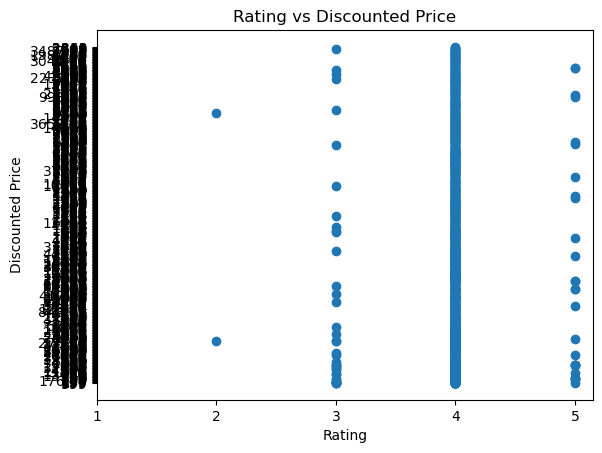

In [35]:
df1['rating'].str.len().value_counts()
df1 = df1[df1['rating'].str.len() > 0]
df1['rating'] = df1['rating'].astype(float).round().astype(int)
plt.scatter(df1['rating'], df1['discounted_price'])
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.title('Rating vs Discounted Price')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

###### The scatter plot shows that most of the products have ratings between 4 and 5

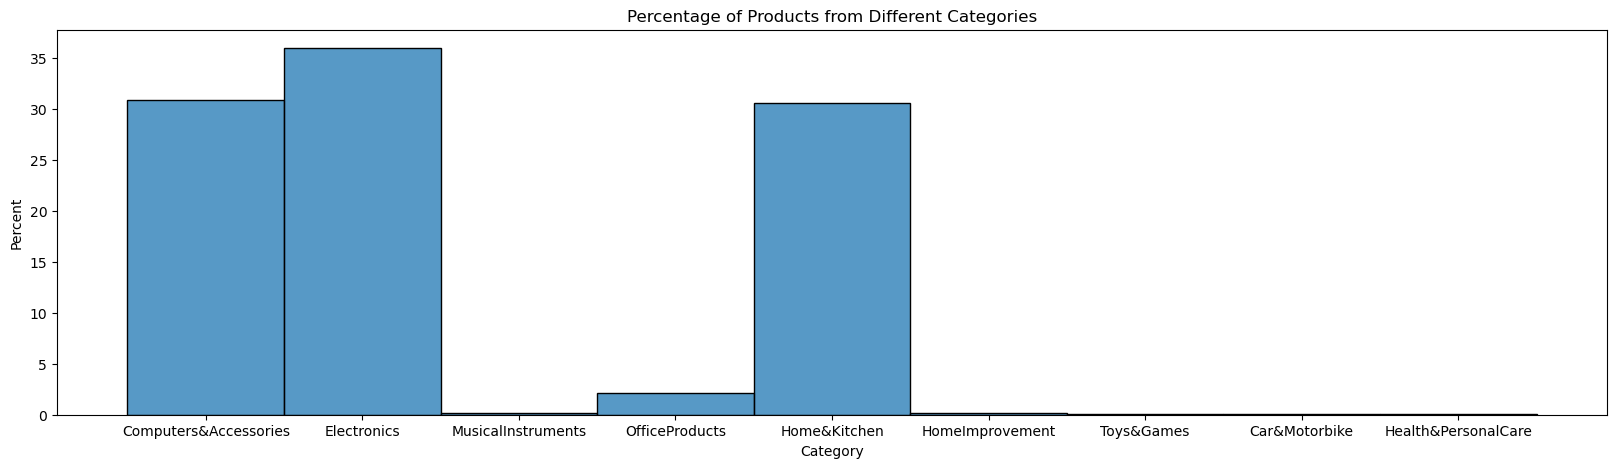

In [14]:
ned = pd.Series(df1['category'].str.split('|', expand=True)[0])
plt.figure(figsize=(20,5))
sns.histplot(data=ned, x=ned, stat='percent')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')
plt.show()

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                  int32
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


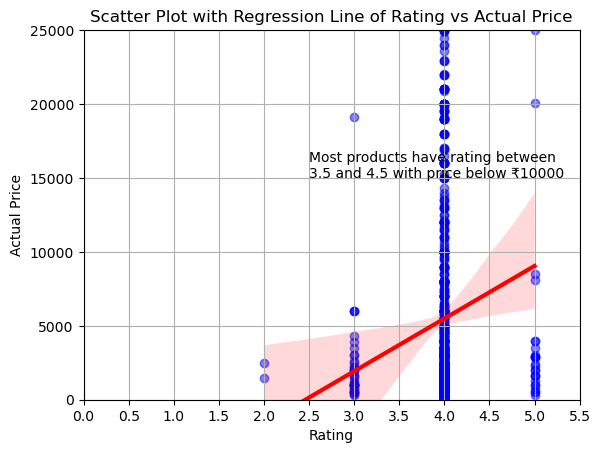

In [15]:
print(df1.dtypes)
df1['actual_price'] = df1['actual_price'].astype(str)
df1['actual_price'] = df1['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
sns.regplot(x='rating', y='actual_price', data=df1,
            scatter_kws={'color': 'blue', 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 3})
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.title('Scatter Plot with Regression Line of Rating vs Actual Price')
plt.grid()
plt.xlim(0, 5.5) 
plt.ylim(0, 25000) 
plt.xticks(np.arange(0, 6, 0.5)) 
plt.yticks(np.arange(0, 30000, 5000))
plt.text(2.5, 15000, 'Most products have rating between\n3.5 and 4.5 with price below ₹10000')
plt.show()


### There is a weak positive correlation between rating and price, meaning that higher rated products tend to have higher prices, but not by much The slope of the regression line is small and close to zero, indicating that the change in price with respect to rating is not significant. The average price for a product with rating 4.0 is around ₹5000, according to the regression line.
.

## Refined Research question/interests

**Discount percentage vs rating of the products**
Plotting Rating vs Discount price did not give much of a significant result. Thereby I want to see how does Discount percentage affect the rating of the product. 

**Distribution of ratings across different product categories** 
It can help us to understand how people perceive and evaluate different types of products. It can also help us to identify which categories have higher or lower customer satisfaction and loyalty. For example, if we find that some categories have higher ratings than others, we might want to investigate what factors make those products more appealing and satisfying to the customers. 

**Number of reviews vary with the actual price of the products**
It can help to determine what segment of price attracts most customers. As higher number of reviews=Higher sale of a particular product. 

/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_24122/2923627240.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('category').mean()[['discounted_price']]


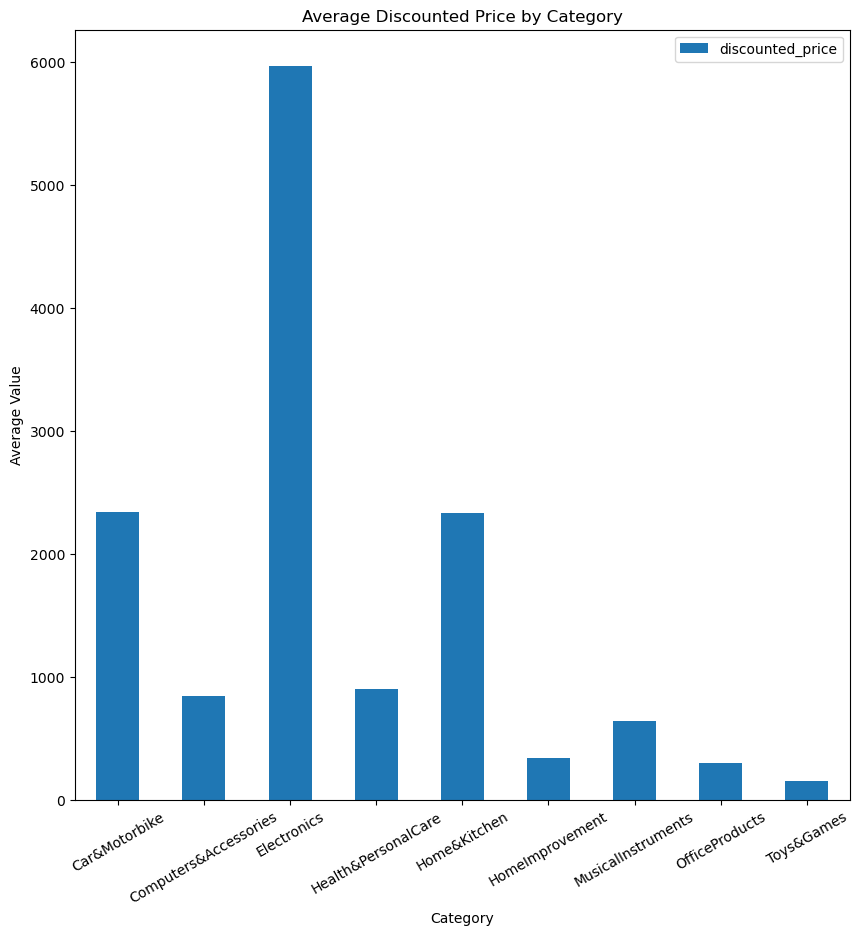

In [ ]:
#graph shows average discounted price for each category


means = df1.groupby('category').mean()[['discounted_price']]


ax = means.plot(kind='bar', figsize=(10,10), rot=0)

ax.set_title('Average Discounted Price by Category')
ax.set_xlabel('Category')
plt.xticks(rotation=30)

ax.set_ylabel('Average Value')


plt.show()

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df10= pd.read_csv('../data/raw/amazon 2.csv')
df=pd.read_csv('../data/raw/amazon 2.csv')

##### Cleaning the data (Removing the columns that are not being used).

In [37]:
print(df10.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [38]:
df10 = df10[['product_id', 'category', 'discounted_price', 'actual_price',
         'discount_percentage', 'rating', 'rating_count', 'review_id',
         'review_title', 'review_content']]


In [39]:
print(df10.isnull().sum())

product_id             0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
review_id              0
review_title           0
review_content         0
dtype: int64


In [40]:
df10 = df10.dropna()

In [41]:
def reduce_category(cat):
    return cat.split('|')[0]

df10['reduced_category'] = df10['category'].apply(reduce_category)
print(df10['reduced_category'].unique())

df10['rating'] = pd.to_numeric(df10['rating'], errors='coerce') # convert 'rating' to numeric
df10['avg_rating'] = df10.groupby('reduced_category')['rating'].transform('mean')


['Computers&Accessories' 'Electronics' 'MusicalInstruments'
 'OfficeProducts' 'Home&Kitchen' 'HomeImprovement' 'Toys&Games'
 'Car&Motorbike' 'Health&PersonalCare']


In [42]:
df10

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_id,review_title,review_content,reduced_category,avg_rating
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,4.155654
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,4.155654
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,4.155654
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,4.155654
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,4.155654
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4.0,"1,090","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,4.040716
1461,B01M6453MB,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,4.040716
1462,B009P2LIL4,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,4.040716
1463,B00J5DYCCA,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4.0,"8,031","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,Home&Kitchen,4.040716


##### Created a new column avg_rating, this column will help us to get a quick overview of the products average rating and also help us to analyze product categories have the highest average ratings. 

In [49]:
df10['discounted_price'] = df10['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df10['actual_price'] = df10['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df10['discounted_percent'] = df10['discounted_price'] / df10['actual_price'] 
df10

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_id,review_title,review_content,reduced_category,avg_rating,discounted_percent
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,4.155654,0.363057
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,4.155654,0.570201
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,4.155654,0.104792
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,4.155654,0.470672
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,4.155654,0.385965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59%,4.0,"1,090","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,4.040716,0.412405
1461,B01M6453MB,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25%,4.1,"4,118","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,4.040716,0.748768
1462,B009P2LIL4,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28%,3.6,468,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,4.040716,0.720455
1463,B00J5DYCCA,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26%,4.0,"8,031","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,Home&Kitchen,4.040716,0.740212


##### Creating a new column (discount_percent_of_actual) which is discounted price/actual price. This gives discount percentage. This can be helpful in analyzing the discount strategies and customer behaviour with taking into context the number of ratings and reviews for the product.

In [50]:
print(df10.columns)

Index(['product_id', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'review_id',
       'review_title', 'review_content', 'reduced_category', 'avg_rating',
       'discounted_percent'],
      dtype='object')


##### I have carried out replace operations to remove currency symbols and comma separators from the discounted_percent. The columns have been converted to float type to perform arithmetic operations on them

In [51]:
df10 = df10.replace({"5 star": 5, "4 star": 4, "3 star": 3, "2 star": 2, "1 star": 1})

In [81]:
def load_and_process(filename):
    df10 = pd.read_csv(filename)
    
    # Method Chain 1: Remove columns not being used, deal with incorrect data, and deal with missing data
    df10 = (df10.drop(columns=['product_link', 'review_title', 'review_content'])
         .replace('Not available', pd.np.nan)
         .dropna())
    
    # Method Chain 2: Create new columns
    df10 = (df10[['product_id', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating']]
          .rename(columns={'category': 'reduced_category', 'rating': 'avg_rating', 'discount_percentage': 'discounted_percent'})
          .assign(discounted_price=df10['discounted_price'].astype(str),
                  actual_price=df10['actual_price'].astype(str))
          .assign(reduced_category=df10['reduced_category'].apply(lambda x: x.split('|')[0]),
                  avg_rating=pd.to_numeric(df10['avg_rating'], errors='coerce'),
                  discounted_price=df10['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float),
                  actual_price=df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float),
                  discounted_percent=df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float) / df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)))
    return df10

In [ ]:
from ../code import project_functions2
df10 = project_functions2.load_and_process('../data/raw/amazon 2.csv')
df10

#### Distribution of discounted percentage:

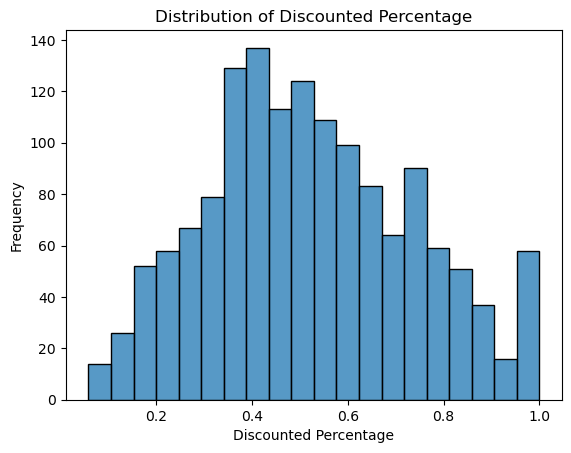

In [59]:
# creating a histogram of the distribution of discounted percentage
sns.histplot(data=df10, x='discounted_percent', bins=20)
plt.xlabel('Discounted Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Percentage')
plt.show()


##### The distribution of discounted percentage shows the frequency distribution of the discount amounts across all the products in the dataset. It gives us an idea of the typical discount percentage that is offered on products in the dataset and how frequently these discounts occur. The x-axis represents the different ranges of discounted percentage and the y-axis represents the frequency of products falling within that range. The histogram shows that the majority of products have a discounted percentage of around 0.4-0.6%. 

#### Distribution of ratings across different product categories:

ValueError: shape mismatch: objects cannot be broadcast to a single shape

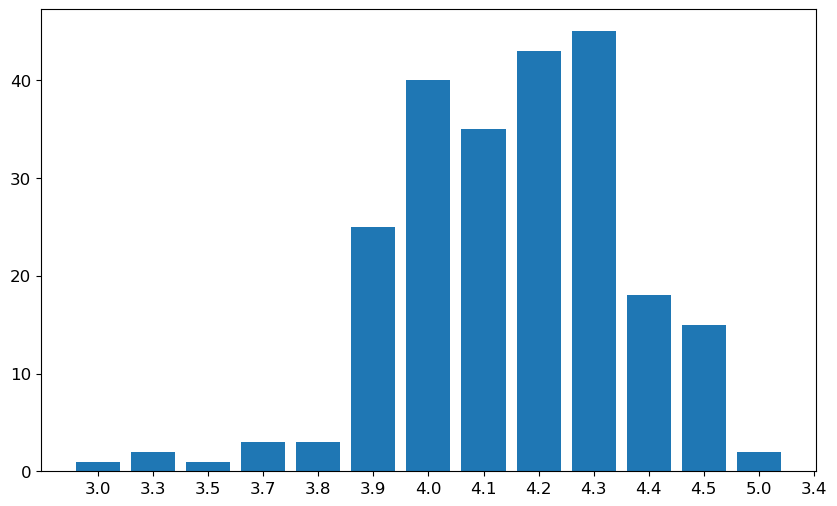

In [75]:
# group the data by category and rating, then count the number of occurrences
rating_counts = df.groupby(['category', 'rating'])['rating'].count()

# create a stacked bar chart of the rating distribution for each category
categories = df['category'].unique()
fig, ax = plt.subplots(figsize=(10,6))
bottom = None
for category in categories:
    counts = rating_counts[category]
    ax.bar(counts.index, counts.values, bottom=bottom, label=category)
    if bottom is None:
        bottom = counts.values
    else:
        bottom += counts.values
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ratings by Category')
ax.legend()
plt.show()


#####  The bar chart shows the distribution of ratings across different product categories. Each color in the bar represents a category, and the height of each colored section corresponds to the number of products with that rating in that category. The chart allows us to compare the distribution of ratings across different categorier. Thereby in response to the graph we get to know that most products have ratings between 3.9 - 4.3.  From the two visualizations we know that the discount percentage at Amazon is minimum, increasing their profits. Also most of the product categories have good ratings

### Number of reviews with the actual price of the products:

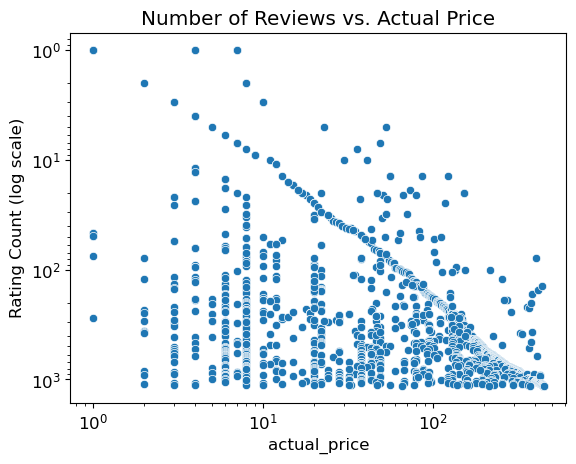

In [77]:
sns.scatterplot(x='actual_price', y='rating_count', data=df)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Rating Count (log scale)')
plt.title('Number of Reviews vs. Actual Price')
plt.show()


##### The scatter plot shows the relationship between the actual price of the products and the number of reviews (rating count). The plot shows that for lower actual prices, there are very few reviews (sparse points). As the actual price increases, the number of reviews increases, and the points become more closely packed. Between actual prices of 10^1 to 10^2, the points are densely packed indicating a high number of reviews for products with these prices. The y-axis shows the logarithmic scale of the number of reviews, and it indicates that most products have fewer than 10^3 reviews, with points being more closely packed between 10^2 to 10^3.